# Impact of Climate Change on Agricultural Yield

## Introduction
Climate change significantly affects agricultural productivity through changes in temperature, rainfall, and extreme weather events. These shifts can disrupt growing conditions, reduce crop quality, and alter yields. By analyzing climate variables and their impact on agricultural output, we aim to predict crop yields using a regression model. This approach can help better understand and mitigate the effects of climate change on agriculture.



## 1. Import Libraries

Import necessary libraries for data analysis, visualization, and machine learning.




In [21]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")

## 2. Load Dataset

Load the dataset into a Pandas DataFrame to explore the data.

In [22]:
# Load the dataset
df = pd.read_csv(r'C:\Users\athar\Documents\Coding\AI\Projects\Data\climate_change_impact_on_agriculture.csv')

# Display the first few rows
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


## 3. Data Understanding and Exploratory Data Analysis (EDA)
Inspect the first few rows of the dataset and get an overview of its structure. This includes understanding column names, data types, and checking for any missing values that need to be handled.


In [23]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [24]:
# Summary statistics
df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [25]:
# Check for missing values
df.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

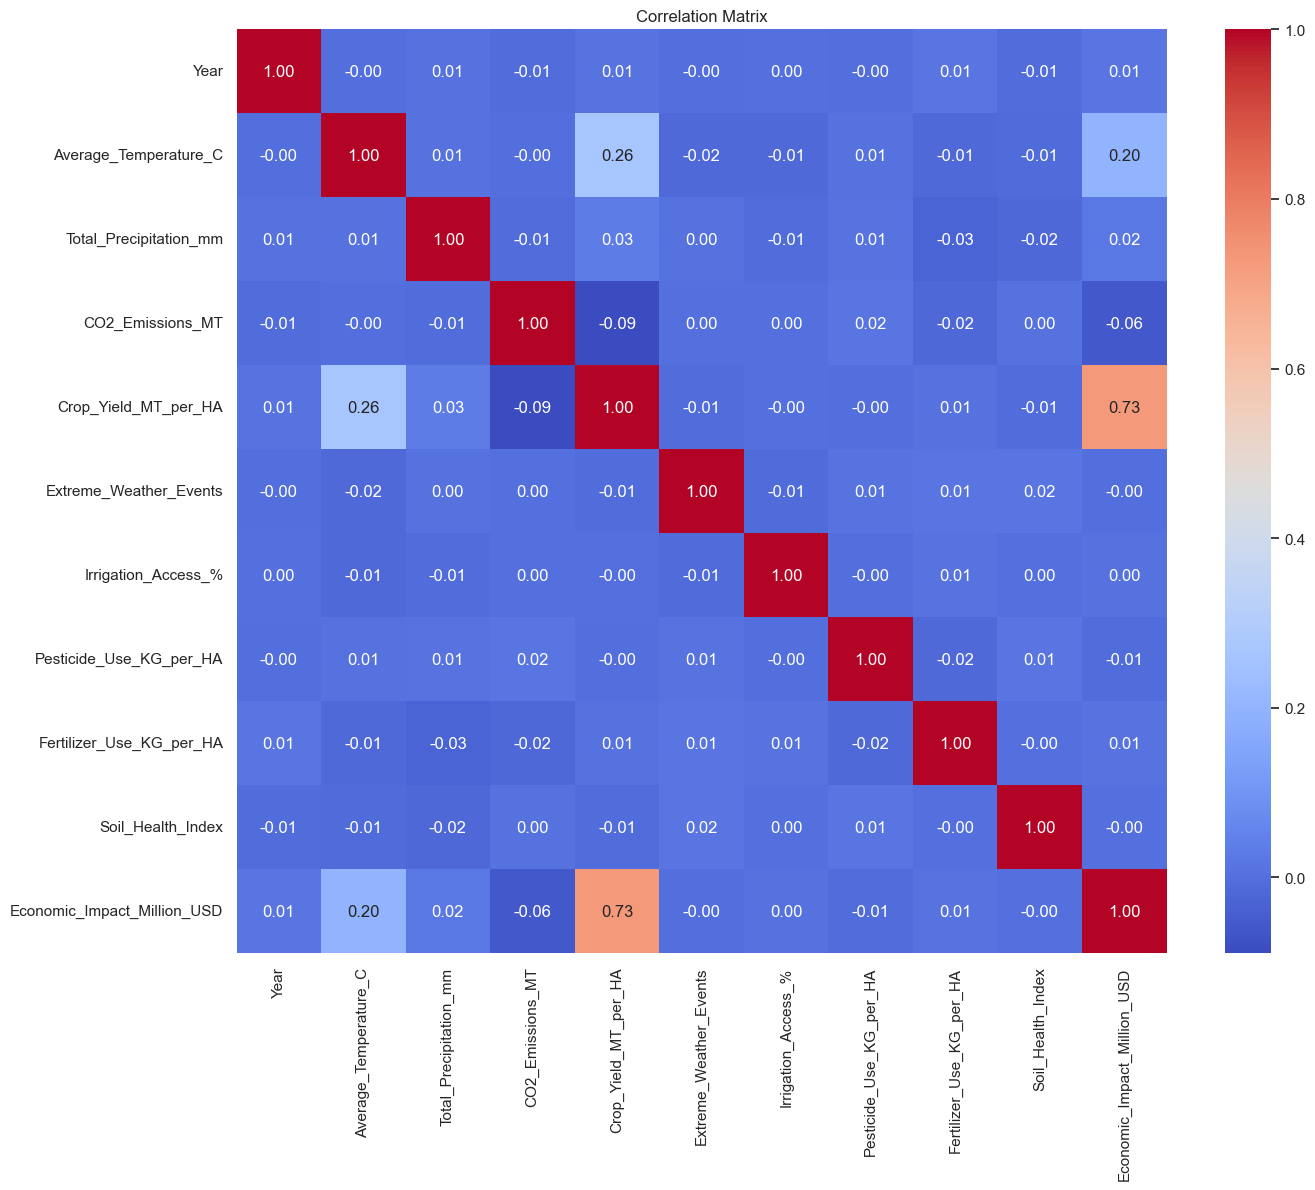

In [26]:
# Compute correlation matrix
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Correlation Analysis

The correlation matrix reveals the relationships between features and the target variable. Notably:

- **Y (Crop_Yield_MT_per_HA)** has good correlations with:
  - Average_Temperature_C
  - Economic_Impact_Million_USD

Understanding these correlations helps in feature selection and engineering.

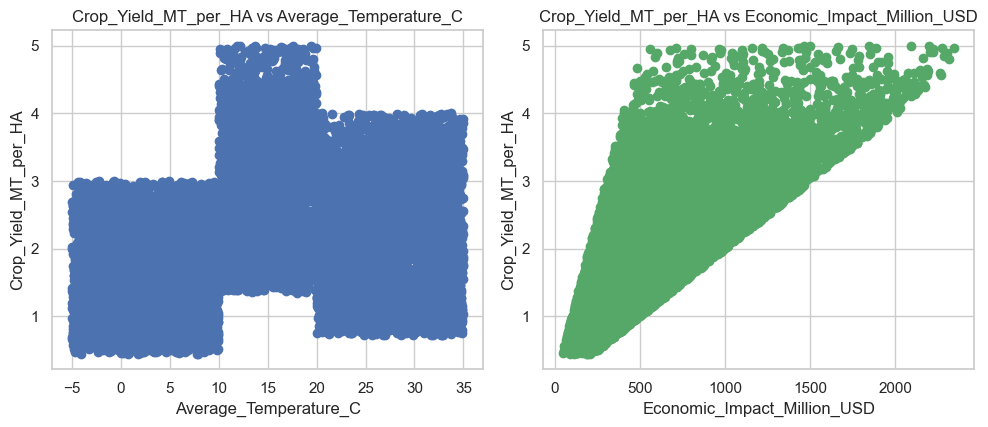

In [27]:
# Scatter plot between each feature and Y1 (Heating Load)
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(df['Average_Temperature_C'], df['Crop_Yield_MT_per_HA'], color='b')
plt.xlabel('Average_Temperature_C')
plt.ylabel('Crop_Yield_MT_per_HA')
plt.title('Crop_Yield_MT_per_HA vs Average_Temperature_C')

plt.subplot(2, 2, 2)
plt.scatter(df['Economic_Impact_Million_USD'], df['Crop_Yield_MT_per_HA'], color='g')
plt.xlabel('Economic_Impact_Million_USD')
plt.ylabel('Crop_Yield_MT_per_HA')
plt.title('Crop_Yield_MT_per_HA vs Economic_Impact_Million_USD')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

Data preprocessing is essential to prepare the dataset for machine learning models. The steps include:

1. **Outlier Removal**
1. **Encoding Features**
2. **Feature Scaling**

In [28]:
# Detect outliers using IQR only for numeric features
from scipy import stats

# Calculate IQR for each numeric feature
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria for numeric columns
is_outlier = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))

# Remove rows with outliers in any numeric column
df_clean = df[~is_outlier.any(axis=1)]

# Print the shape of the dataset after removing outliers
print(f"Dataset shape after outlier removal: {df_clean.shape}")


Dataset shape after outlier removal: (9823, 15)


In [29]:
# Initialize Label Encoder
le = LabelEncoder()

categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

In [30]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

## 5. Model Selection and Training

### Steps:
1. **Splitting the Data:** Divide the dataset into training and testing sets.
2. **Choosing Regression Algorithms:** Evaluate multiple models to identify the best performer.
3. **Training Models:** Fit models on the training data.
4. **Evaluating Initial Performance:** Assess models using validation metrics.

In [31]:
# Define target variable
# Replace 'target_column' with the actual target column name from your dataset
target = 'Crop_Yield_MT_per_HA'

# Features and target
X = df_clean.drop(columns=[target])
y = df_clean[target]

### Train-Test Split

We use an 80-20 split with stratification to ensure that the class distribution remains consistent across training and testing sets. This approach prevents biased model evaluation, especially in cases of imbalanced classes.

In [32]:
# Split the data into training and testing sets
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (7858, 14), Testing set: (1965, 14)


In [33]:
# Define a dictionary of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

In [34]:
# Initialize a list to store model performance
performance = []

# Iterate through models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    # Append results as a dictionary to the performance list
    performance.append({
        'Model': name,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2-Score': R2
    })

# Convert the performance list to a DataFrame
performance_df = pd.DataFrame(performance)

# Sort the DataFrame by Accuracy in descending order
performance_df = performance_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

# Display the performance DataFrame
performance_df

,Model,RMSE,MAE,R2-Score
0,Gradient Boosting,0.663196,0.535214,0.571069
1,Random Forest,0.678015,0.543467,0.551686
2,XGBoost,0.712151,0.569919,0.505407
3,Linear Regression,0.722943,0.580993,0.490304


## Hyperparameter Tuning

Hyperparameter tuning optimizes model performance by adjusting parameters that control the learning process. We'll use **Randomized Search CV** with **Cross-Validation** to identify the best hyperparameters for our models.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for RandomizedSearchCV
gbr_param_dist = {
    'n_estimators': randint(100, 500),  
    'learning_rate': uniform(0.01, 0.19),  
    'max_depth': randint(3, 10),  
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),  
    'subsample': uniform(0.6, 0.4),  
    'max_features': ['auto', 'sqrt', 'log2', None], 
    'alpha': uniform(0.1, 0.3),  #
}

# Initialize RandomizedSearchCV for Gradient Boosting Regressor
gbr_random = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gbr_param_dist,
    n_iter=150,  
    cv=5, 
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit the randomized search
gbr_random.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters for Gradient Boosting: {gbr_random.best_params_}")

# Best estimator
best_gbr = gbr_random.best_estimator_


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters for Gradient Boosting: {'alpha': 0.2080571924233789, 'learning_rate': 0.034141497403858106, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 207, 'subsample': 0.8491561903276001}


### Hyperparameter Tuning Results

The **Random Search CV** identifies the optimal combination of hyperparameters that maximizes the weighted F1-score. Comparing the tuned model's performance with the initial baseline indicates improvements in classification metrics, demonstrating enhanced model robustness and accuracy.


In [36]:
# Predictions with the best estimator
y_pred_best_gbr = best_gbr.predict(X_test)

# Evaluation
print("Tuned Gradient Boosting Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best_gbr)):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_gbr):.3f}")
print(f"R2 Score: {r2_score(y_test, y_pred_best_gbr):.3f}\n")

Tuned Gradient Boosting Performance:
RMSE: 0.662
MAE: 0.534
R2 Score: 0.572



## 6. Model Evaluation 

### Final Model Selection

After evaluating multiple models and performing hyperparameter tuning, the **Tuned Gradient Boost** emerges as the best-performing model with the best RMSE and balanced performance across all classes.


In [37]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the final regression model for R^2 scores
cv_r2_scores = cross_val_score(best_gbr, X, y, cv=10, scoring='r2')

# Print the R^2 scores
print(f"### Cross-Validation R² Scores for Gradient Boosting Regressor ###")
print(cv_r2_scores)
print(f"Mean CV R² Score: {cv_r2_scores.mean():.4f}")
print(f"Standard Deviation of CV R² Scores: {cv_r2_scores.std():.4f}")

### Cross-Validation R² Scores for Gradient Boosting Regressor ###
[0.60199252 0.60639092 0.59429711 0.60504112 0.60380728 0.5745683
 0.5720126  0.58966694 0.58814166 0.59657463]
Mean CV R² Score: 0.5932
Standard Deviation of CV R² Scores: 0.0116


## Conclusion

This project successfully predicts Agricultural Yield using various economical and environmental features. Through comprehensive EDA, data preprocessing, feature engineering, and rigorous model evaluation, the **Tuned Gradient Boosting** model was identified as the most effective regressor.
